In [147]:
import numpy as np
from python.sampling import create_sample, load_mean_and_cov, unconditional_samples, substract_params, fix_true_params, params_to_respy
from python.qoi import unconditional_quantile_y, conditional_quantile_y, quantitiy_of_interest
from python.QBSM import quantile_measures, normalized_quantile_measures

from joblib import Parallel, delayed

## Quantity of interest

In [148]:
n_samples = 30
seed = 123
M = 8

# # range of alpha
dalp = (0.98 - 0.02) / 30
alpha_grid = np.arange(0.02, 0.98 + dalp, dalp)  # len(alpha_grid) = 31

In [149]:
input_x_respy, input_x_mix_respy = create_sample(n_samples,
                  seed,
                  M = 8,
                  sampling_method="random",
                  MC_method="Brute force",
                  )

In [153]:
from time import time

start = time()
quantile_y_x = unconditional_quantile_y(input_x_respy, alpha_grid, quantitiy_of_interest)
end = time()

print(f'\nTime to complete: {end - start:.2f}s\n')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Time to complete: 83.88s



In [154]:
def y_kde_plot(y):
    fig = plt.figure(figsize=(10, 8))
    ax = sns.kdeplot(y, shade=False, color='crimson')
    kdeline = ax.lines[0]
    mean = y.mean()
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height, color='crimson', ls=':')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    return fig, ax

(<Figure size 720x576 with 1 Axes>, <AxesSubplot:ylabel='Density'>)

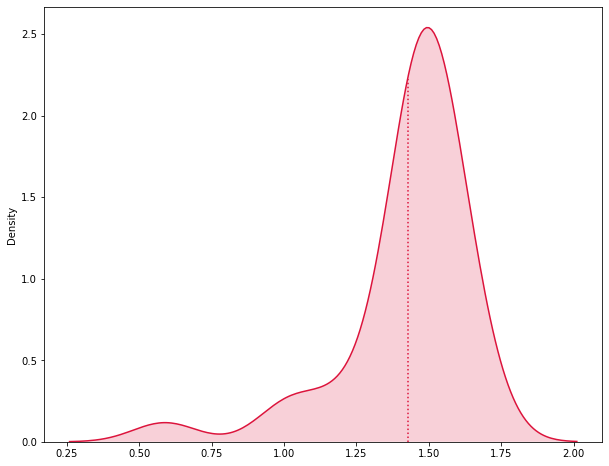

In [155]:
y_kde_plot(quantile_y_x)

In [ ]:
quantile_y_x_mix = conditional_quantile_y(input_x_mix_respy, quantitiy_of_interest, alpha_grid)

## QBSM

In [10]:
q_1, q_2 = quantile_measures(quantile_y_x, quantile_y_x_mix)

In [11]:
norm_q_1, norm_q_2= normalized_quantile_measures(q_1, q_2)

In [56]:
def QBSM_plot(measure_1, measure_2):

    dalp = (0.98 - 0.02) / 30
    alp = np.arange(0.02, 0.98 + dalp, dalp)

    fig, ax = plt.subplots(figsize=(9, 7))

    ax.set_title(
        r'$Q_i^{(1)}$ and $Q_i^{(2)}$ versus α and values of Sobol ’ sensitivity indices.'
    )
    ax.set_xlabel(r"$\alpha$", fontsize=15)
    ax.set_ylabel("Measures", fontsize=15)

    colors = ['r', 'b', 'g']

    for i in range(3):
        ax.plot(alp, measure_1[:, i], colors[i]+'s--',
                label=r'$Q_1^{(%s)}$' % (i+1), markerfacecolor='none')
        ax.plot(alp, measure_2[:, i], colors[i]+'o--',
                label=r'$Q_2^{(%s)}$' % (i+1), markerfacecolor='none')

    return fig, ax

(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'$Q_i^{(1)}$ and $Q_i^{(2)}$ versus α and values of Sobol ’ sensitivity indices.'}, xlabel='$\\alpha$', ylabel='Measures'>)

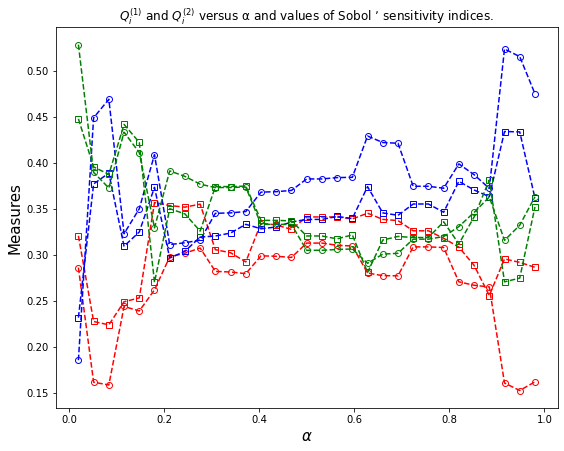

In [57]:
QBSM_plot(norm_q_1, norm_q_2)

In [139]:
from python.sobol_indices import sobol_indices

In [142]:
S_total_array = sobol_indices(300, 123, 31, "random")

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.




Term    	      Sa            Sb             S             ST         #select 
------------------------------------------------------------------------------------
alpha_{11}    	  1.03 (±0.08) -0.13 (±0.06)  0.91 (±0.05)  0.96 (±0.04)    1  
beta_{1}      	  0.14 (±0.05) -0.13 (±0.05)  0.01 (±0.04)  0.06 (±0.05)    1  
gamma_{0}     	  0.01 (±0.01) -0.01 (±0.01) -0.00 (±0.01)  0.03 (±0.02)    1  
alpha_{11}/beta_{1}   	  0.03 (±0.01)  0.01 (±0.01)  0.04 (±0.01)                  1  
alpha_{11}/gamma_{0}   	  0.02 (±0.01)  0.01 (±0.01)  0.02 (±0.01)                  1  
beta_{1}/gamma_{0}   	  0.01 (±0.01)  0.01 (±0.01)  0.01 (±0.01)                  1  
------------------------------------------------------------------------------------
Sum           	  1.25 (±0.00) -0.23 (±0.00)  0.99 (±0.00)


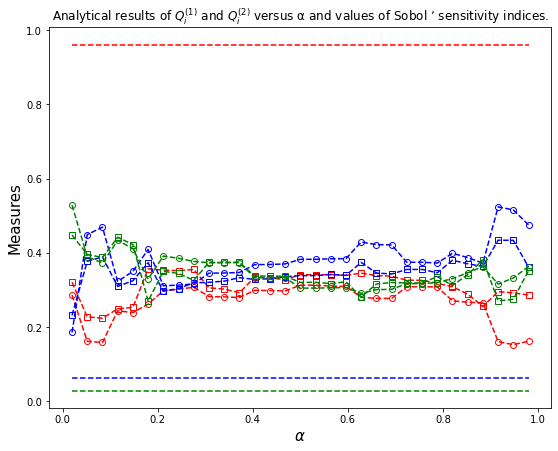

In [145]:
alp = np.arange(0.02, 0.98 + dalp, dalp) 

fig, ax = plt.subplots(figsize=(9,7))
            
ax.set_title(r'Analytical results of $Q_i^{(1)}$ and $Q_i^{(2)}$ versus α and values of Sobol ’ sensitivity indices.')
ax.set_xlabel(r"$\alpha$", fontsize=15)
ax.set_ylabel("Measures", fontsize=15)

colors = ['r','b','g']   

for i in range(3):
    ax.plot(alp, S_total_array[:, i], colors[i]+'--', label=r'$S_1$')
    ax.plot(alp, norm_q_1[:,i], colors[i]+'s--', label=r'$Q_1^{(%s)}$'%(i+1), markerfacecolor='none')
    ax.plot(alp, norm_q_2[:,i], colors[i]+'o--', label=r'$Q_2^{(%s)}$'%(i+1), markerfacecolor='none')